In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


In [1]:
ruta_base = "../Asistencia/Data/Base.xlsx"

In [4]:
df = pd.read_excel(ruta_base)

# **Transformación de variables categoricas a numericas y Limpieza de datos: Quitar nulos**
- Si una columna tiene más del 30% de nulos, se elimina (poca información útil)
- Si tiene menos, se reemplazan los valores faltantes con la media o mediana si son numéricos.

In [23]:
ruta_salida = r'C:\Users\JuanK\LaboratorioIA2\asistencia\Data\Base_final.xlsx'
print("Vista general de la base original:")
display(df.head())

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    encoders[column] = le

print(f"\nColumnas categoricas convertidas: {list(categorical_columns)}")

print("\nConteo de valores nulos antes de limpieza:")
print(df.isnull().sum())

nulos_porcentaje = df.isnull().mean() * 100
cols_muy_incompletas = nulos_porcentaje[nulos_porcentaje > 30].index
df = df.drop(columns=cols_muy_incompletas)
print(f"\nColumnas eliminadas (mas del 30% de nulos): {list(cols_muy_incompletas)}")

for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"Nulos en '{col}' reemplazados por la mediana ({mediana})")

print("\nValores nulos despues de limpieza:")
print(df.isnull().sum())

df.to_excel(ruta_salida, index=False)

print("\n✅ Transformacion y limpieza completadas.")
print(f"📄 Archivo final guardado en: {ruta_salida}")

Vista general de la base original:


,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,5069,1,2003,2003-09-28,2,657742779,661368582,1547203566,177853085,303405332,62,58,7865,10596,92,38
1,2,3656,1,1988,1988-02-14,9,18838101,193094915,363773112,24711574,83182884,52,44,1708,220,13,24
2,4,2774,1,1998,1998-08-06,9,144731146,202368392,437382026,57065772,89888601,73,87,2467,1751,108,228
3,5,3153,2,2021,2021-12-17,5,90091586,21296291,311301738,36118937,86177591,61,67,5555,697,53,95
4,6,2057,3,1996,1996-05-09,9,635605811,679042062,123321927,187725188,368152422,89,100,362,229,142,46



Columnas categoricas convertidas: []

Conteo de valores nulos antes de limpieza:
MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

Columnas eliminadas (mas del 30% de nulos): []

Valores nulos despues de limpieza:
MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT     

- Si una columna tiene más del 30% de nulos, se elimina (poca información útil)
- Si tiene menos, se reemplazan los valores faltantes con la media o mediana si son numéricos.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720471 entries, 0 to 720470
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   MovieID               720471 non-null  int64         
 1   Title                 720471 non-null  int64         
 2   Genre                 720471 non-null  int64         
 3   ReleaseYear           720471 non-null  int64         
 4   ReleaseDate           720471 non-null  datetime64[ns]
 5   Country               720471 non-null  int64         
 6   BudgetUSD             720471 non-null  int64         
 7   US_BoxOfficeUSD       720471 non-null  int64         
 8   Global_BoxOfficeUSD   720471 non-null  int64         
 9   Opening_Day_SalesUSD  720471 non-null  int64         
 10  One_Week_SalesUSD     720471 non-null  int64         
 11  IMDbRating            720471 non-null  int64         
 12  RottenTomatoesScore   720471 non-null  int64         
 13 

In [ ]:
#estadisticas numericas
display(df.describe())

#estadisticas para object/categoricas
display(df.describe(include='all').T)

# Cantidad de valores unicos por columna 
display(df.nunique().sort_values(ascending=False))

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
count,720471.000000,720471.000000,720471.000000,720471.000000,720471,720471.000000,7.204710e+05,7.204710e+05,7.204710e+05,7.204710e+05,7.204710e+05,720471.000000,720471.000000,720471.000000,720471.000000,720471.000000,720471.000000
mean,499912.258645,4827.040750,2.949386,2007.966201,2008-06-19 01:46:10.232806400,7.565201,7.312448e+08,9.600662e+08,1.405349e+09,2.588411e+08,5.712249e+08,58.330428,64.766680,9150.294037,2028.568929,74.471719,148.860558
min,1.000000,0.000000,0.000000,1987.000000,1987-01-01 00:00:00,0.000000,1.000000e+05,4.457200e+04,1.000000e+05,6.057000e+03,1.903600e+04,1.000000,0.000000,100.000000,50.000000,0.000000,0.000000
25%,249704.000000,2403.000000,1.000000,1999.000000,1999-04-19 00:00:00,8.000000,8.890332e+07,1.106357e+08,2.019778e+08,2.075656e+07,5.506905e+07,49.000000,53.000000,1083.000000,120.000000,37.000000,75.000000
50%,499737.000000,4831.000000,3.000000,2009.000000,2009-05-27 00:00:00,9.000000,2.723527e+08,3.615418e+08,6.587107e+08,6.957626e+07,1.806141e+08,63.000000,65.000000,2981.000000,406.000000,74.000000,148.000000
75%,750055.500000,7251.000000,4.000000,2018.000000,2018-02-21 00:00:00,9.000000,7.903075e+08,1.106067e+09,1.780247e+09,2.208920e+08,5.626856e+08,74.000000,77.000000,8191.000000,1365.000000,112.000000,223.000000
max,999999.000000,9664.000000,7.000000,2025.000000,2025-12-31 00:00:00,9.000000,9.999646e+09,9.999792e+09,9.999842e+09,9.997976e+09,9.999536e+09,99.000000,100.000000,1000000.000000,500000.000000,149.000000,298.000000
std,288708.301760,2794.380879,2.178375,11.079370,NaN,2.684755,1.238772e+09,1.509346e+09,1.862299e+09,6.312031e+08,1.089780e+09,22.633255,17.607724,25313.873088,8409.128760,43.328942,86.076092


,count,mean,min,25%,50%,75%,max,std
MovieID,720471.0,499912.258645,1.0,249704.0,499737.0,750055.5,999999.0,288708.30176
Title,720471.0,4827.04075,0.0,2403.0,4831.0,7251.0,9664.0,2794.380879
Genre,720471.0,2.949386,0.0,1.0,3.0,4.0,7.0,2.178375
ReleaseYear,720471.0,2007.966201,1987.0,1999.0,2009.0,2018.0,2025.0,11.07937
ReleaseDate,720471,2008-06-19 01:46:10.232806400,1987-01-01 00:00:00,1999-04-19 00:00:00,2009-05-27 00:00:00,2018-02-21 00:00:00,2025-12-31 00:00:00,NaN
Country,720471.0,7.565201,0.0,8.0,9.0,9.0,9.0,2.684755
BudgetUSD,720471.0,731244796.889195,100000.0,88903320.5,272352745.0,790307509.0,9999646368.0,1238772100.726309
US_BoxOfficeUSD,720471.0,960066239.131114,44572.0,110635693.5,361541828.0,1106066892.5,9999792093.0,1509345634.083673
Global_BoxOfficeUSD,720471.0,1405348734.471313,100000.0,201977794.5,658710746.0,1780247310.0,9999841908.0,1862299485.156941
Opening_Day_SalesUSD,720471.0,258841100.291473,6057.0,20756555.0,69576262.0,220891973.5,9997976366.0,631203099.974395


,0
MovieID,720471
US_BoxOfficeUSD,720192
One_Week_SalesUSD,719924
Global_BoxOfficeUSD,719420
Opening_Day_SalesUSD,719025
BudgetUSD,712013
NumVotesIMDb,61377
NumVotesRT,26898
ReleaseDate,14245
Title,9665


In [ ]:
print("Valores Nulos")
null_analysis = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df)) * 100,
    'Valores_Blancos': (df == '').sum(),
    'Valores_0': (df == 0).sum()
})
print(null_analysis)

Valores Nulos
                                   Columna  Valores_Nulos  Porcentaje_Nulos  \
MovieID                            MovieID              0               0.0   
Title                                Title              0               0.0   
Genre                                Genre              0               0.0   
ReleaseYear                    ReleaseYear              0               0.0   
ReleaseDate                    ReleaseDate              0               0.0   
Country                            Country              0               0.0   
BudgetUSD                        BudgetUSD              0               0.0   
US_BoxOfficeUSD            US_BoxOfficeUSD              0               0.0   
Global_BoxOfficeUSD    Global_BoxOfficeUSD              0               0.0   
Opening_Day_SalesUSD  Opening_Day_SalesUSD              0               0.0   
One_Week_SalesUSD        One_Week_SalesUSD              0               0.0   
IMDbRating                      IMDbRa

In [ ]:
def limpiar_datos(df):
    df_clean = df.copy()

    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

    columnas_clave = ['presupuesto', 'ingresos', 'ganancias', 'rentabilidad']

    for col in columnas_clave:
        if col in df_clean.columns:
            if col in ['presupuesto', 'ingresos']:
                df_clean = df_clean[df_clean[col] > 0]

    text_cols = ['titulo', 'director', 'genero', 'actores']
    for col in text_cols:
        if col in df_clean.columns:
            # Eliminar espacios en blanco
            df_clean[col] = df_clean[col].str.strip()
            # Reemplazar valores vacíos
            df_clean[col] = df_clean[col].replace('', 'Desconocido')

    date_cols = ['fecha_estreno', 'año']
    for col in date_cols:
        if col in df_clean.columns:
            # Convertir a formato fecha
            try:
                df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            except:
                pass

    #Calcular rentabilidad si no existe
    if 'presupuesto' in df_clean.columns and 'ingresos' in df_clean.columns:
        df_clean['rentabilidad'] = (df_clean['ingresos'] - df_clean['presupuesto']) / df_clean['presupuesto']

    return df_clean

In [ ]:
df_clean = limpiar_datos(df)
print(f"Filas despues de limpieza: {df_clean.shape}")

Filas despues de limpieza: (720471, 17)


In [ ]:
def analisis_estadistico_mejorado(df):
    print("=== ANALISIS ESTADISTICO MEJORADO ===\n")

    # 1. IDENTIFICAR Y FILTRAR VALORES IRREALES
    print("1. FILTRADO DE VALORES IRREALES")

    limites_realistas = {
        'BudgetUSD': (10000, 500000000),
        'US BoxOfficeUSD': (1000, 1000000000),
        'Global BoxOfficeUSD': (1000, 3000000000)
    }

    df_filtrado = df.copy()
    filas_antes = len(df_filtrado)

    for columna, (min_real, max_real) in limites_realistas.items():
        if columna in df_filtrado.columns:
            # Contar valores irreales
            irreales = ((df_filtrado[columna] < min_real) | (df_filtrado[columna] > max_real)).sum()
            print(f"   {columna}: {irreales} valores fuera de rango realista (${min_real:,} - ${max_real:,})")

            # Filtrar
            df_filtrado = df_filtrado[
                (df_filtrado[columna] >= min_real) &
                (df_filtrado[columna] <= max_real)
            ]

    print(f"   Filas eliminadas por valores irreales: {filas_antes - len(df_filtrado)}")
    print(f"   Filas restantes: {len(df_filtrado)}\n")

    # 2. ESTADÍSTICAS ROBUSTAS (resistentes a outliers)
    columnas_numericas = ['BudgetUSD', 'US BoxOfficeUSD', 'Global BoxOfficeUSD', 'IMDbRating']

    for col in columnas_numericas:
        if col in df_filtrado.columns:
            print(f"2. ANÁLISIS DE {col}")
            datos = df_filtrado[col].dropna()

            # Estadísticas básicas
            stats = {
                'Count': len(datos),
                'Mean': f"${datos.mean():,.0f}" if 'USD' in col else f"{datos.mean():.2f}",
                'Median': f"${datos.median():,.0f}" if 'USD' in col else f"{datos.median():.2f}",
                'Std': f"${datos.std():,.0f}" if 'USD' in col else f"{datos.std():.2f}",
                'Min': f"${datos.min():,.0f}" if 'USD' in col else f"{datos.min():.2f}",
                'Max': f"${datos.max():,.0f}" if 'USD' in col else f"{datos.max():.2f}",
            }

            for key, value in stats.items():
                print(f"   {key}: {value}")

            # Detección de outliers usando IQR (método más robusto)
            Q1 = datos.quantile(0.25)
            Q3 = datos.quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]
            print(f"   Outliers detectados (IQR): {len(outliers)} ({len(outliers)/len(datos)*100:.1f}%)\n")

    return df_filtrado

# Aplicar análisis mejorado
df_mejorado = analisis_estadistico_mejorado(df)

=== ANÁLISIS ESTADISTICO MEJORADO ===

1. FILTRADO DE VALORES IRREALES
   BudgetUSD: 252725 valores fuera de rango realista ($10,000 - $500,000,000)
   Filas eliminadas por valores irreales: 252725
   Filas restantes: 467746

2. ANÁLISIS DE BudgetUSD
   Count: 467746
   Mean: $165,742,524
   Median: $129,001,121
   Std: $135,202,088
   Min: $100,000
   Max: $499,995,271
   Outliers detectados (IQR): 0 (0.0%)

2. ANÁLISIS DE IMDbRating
   Count: 467746
   Mean: 58.33
   Median: 63.00
   Std: 22.63
   Min: 1.00
   Max: 99.00
   Outliers detectados (IQR): 50880 (10.9%)



In [ ]:
def comparar_estadisticas(df_original, df_filtrado):

    print("COMPARATIVA: ESTADISTICAS ORIGINALES vs FILTRADAS\n")

    columnas_comparar = ['BudgetUSD', 'US BoxOfficeUSD', 'Global BoxOfficeUSD']

    for col in columnas_comparar:
        if col in df_original.columns:
            print(f"--- {col} ---")

            # Original (con outliers)
            orig_data = df_original[col].dropna()
            # Filtrado (sin valores irreales)
            filt_data = df_filtrado[col].dropna()

            comparacion = pd.DataFrame({
                'Métrica': ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max'],
                'Original': [
                    len(orig_data),
                    f"${orig_data.mean():,.0f}",
                    f"${orig_data.median():,.0f}",
                    f"${orig_data.std():,.0f}",
                    f"${orig_data.min():,.0f}",
                    f"${orig_data.max():,.0f}"
                ],
                'Filtrado': [
                    len(filt_data),
                    f"${filt_data.mean():,.0f}",
                    f"${filt_data.median():,.0f}",
                    f"${filt_data.std():,.0f}",
                    f"${filt_data.min():,.0f}",
                    f"${filt_data.max():,.0f}"
                ],
                'Mejora': [
                    f"{(len(filt_data)/len(orig_data)*100):.1f}%",
                    f"{(filt_data.mean()/orig_data.mean()*100 if orig_data.mean() > 0 else 0):.1f}%",
                    f"{(filt_data.median()/orig_data.median()*100 if orig_data.median() > 0 else 0):.1f}%",
                    f"{(filt_data.std()/orig_data.std()*100):.1f}%",
                    "-",
                    "-"
                ]
            })

            print(comparacion.to_string(index=False))
            print()

# Ejecutar comparación
comparar_estadisticas(df, df_mejorado)

COMPARATIVA: ESTADISTICAS ORIGINALES vs FILTRADAS

--- BudgetUSD ---
Métrica       Original     Filtrado Mejora
  Count         720471       467746  64.9%
   Mean   $731,244,797 $165,742,524  22.7%
 Median   $272,352,745 $129,001,121  47.4%
    Std $1,238,772,101 $135,202,088  10.9%
    Min       $100,000     $100,000      -
    Max $9,999,646,368 $499,995,271      -



In [ ]:
import numpy as np
import pandas as pd

def analizar_rentabilidad_quintiles(df_filtrado):

    # 1. VERIFICAR COLUMNAS DISPONIBLES
    print("1️⃣ Verificación de columnas disponibles:")
    columnas_disponibles = df_filtrado.columns.tolist()
    print(f"   Columnas encontradas: {columnas_disponibles}")

    columnas_presupuesto = [col for col in columnas_disponibles if 'budget' in col.lower() or 'presupuesto' in col.lower()]
    columnas_ingresos = [col for col in columnas_disponibles if 'boxoffice' in col.lower() or 'ingresos' in col.lower() or 'revenue' in col.lower()]

    if not columnas_presupuesto or not columnas_ingresos:
        print("⚠️ ERROR: No se encontraron columnas de presupuesto o ingresos.")
        return df_filtrado

    col_presupuesto = columnas_presupuesto[0]
    col_ingresos = columnas_ingresos[0]
    print(f"   Usando columnas: {col_presupuesto} (presupuesto) y {col_ingresos} (ingresos)")

    # 2. LIMPIEZA DE DATOS
    print("\n2️⃣ Limpieza de datos:")
    df_calculo = df_filtrado[
        (df_filtrado[col_presupuesto].notnull()) &
        (df_filtrado[col_ingresos].notnull()) &
        (df_filtrado[col_presupuesto] > 0)
    ].copy()

    print(f"   Filas válidas para cálculo: {len(df_calculo)} de {len(df_filtrado)}")

    if len(df_calculo) == 0:
        print("⚠️ ERROR: No hay datos válidos para calcular rentabilidad.")
        return df_filtrado

    # 3. CALCULAR RENTABILIDAD
    df_calculo['Profitability'] = (df_calculo[col_ingresos] - df_calculo[col_presupuesto]) / df_calculo[col_presupuesto]
    print("✅ Rentabilidad calculada (columna 'Profitability').")

    # 4. CALCULAR QUINTILES
    print("\n3️⃣ Análisis por quintiles de rentabilidad:")
    quintiles = df_calculo['Profitability'].quantile([0.2, 0.4, 0.6, 0.8])
    print("   Quintiles (puntos de corte):")
    for q, v in quintiles.items():
        print(f"   • {int(q*100)}%: {v:.3f}")

    # 5. CREAR CATEGORÍAS SEGÚN QUINTILES
    print("\n4️⃣ Categorizando películas según rentabilidad (1 a 5)...")

    df_calculo['RentabilidadCategoria'] = pd.cut(
        df_calculo['Profitability'],
        bins=[-np.inf, quintiles[0.2], quintiles[0.4], quintiles[0.6], quintiles[0.8], np.inf],
        labels=[1, 2, 3, 4, 5]
    ).astype(int)

    # 6. ASIGNAR ETIQUETAS DESCRIPTIVAS
    etiquetas = {
        1: "Nada rentable",
        2: "Poca rentabilidad",
        3: "Medianamente rentable",
        4: "Algo rentable",
        5: "Muy rentable"
    }
    df_calculo['RentabilidadDescripcion'] = df_calculo['RentabilidadCategoria'].map(etiquetas)

    print("✅ Columna categórica creada: 'RentabilidadCategoria' y 'RentabilidadDescripcion'.")

    # 7. COMBINAR CON LA BASE ORIGINAL
    df_filtrado['Profitability'] = np.nan
    df_filtrado['RentabilidadCategoria'] = np.nan
    df_filtrado['RentabilidadDescripcion'] = 'No calculado'

    df_filtrado.update(df_calculo[['Profitability', 'RentabilidadCategoria', 'RentabilidadDescripcion']])

    # 8. MOSTRAR RESULTADOS
    print("\n5️⃣ Distribución de categorías:")
    distrib = df_calculo['RentabilidadDescripcion'].value_counts().sort_index()
    for cat, count in distrib.items():
        print(f"   • {cat}: {count} películas")

    print("\n✅ Muestra de la base con las nuevas columnas:\n")
    display(df_filtrado.head(10))

    return df_filtrado


# --- LLAMAR LA FUNCIÓN ---
df_final_quintiles = analizar_rentabilidad_quintiles(df_mejorado)


1️⃣ Verificación de columnas disponibles:
   Columnas encontradas: ['MovieID', 'Title', 'Genre', 'ReleaseYear', 'ReleaseDate', 'Country', 'BudgetUSD', 'US_BoxOfficeUSD', 'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD', 'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT', 'Director', 'LeadActor', 'Profitability', 'RentabilidadCategoria', 'RentabilidadCategoriaTexto']
   Usando columnas: BudgetUSD (presupuesto) y US_BoxOfficeUSD (ingresos)

2️⃣ Limpieza de datos:
   Filas válidas para cálculo: 467746 de 467746
✅ Rentabilidad calculada (columna 'Profitability').

3️⃣ Análisis por quintiles de rentabilidad:
   Quintiles (puntos de corte):
   • 20%: -0.336
   • 40%: 0.266
   • 60%: 0.898
   • 80%: 1.758

4️⃣ Categorizando películas según rentabilidad (1 a 5)...
✅ Columna categórica creada: 'RentabilidadCategoria' y 'RentabilidadDescripcion'.

5️⃣ Distribución de categorías:
   • Algo rentable: 93549 películas
   • Medianamente rentable: 93549 películas
   • 

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,...,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor,Profitability,RentabilidadCategoria,RentabilidadCategoriaTexto,RentabilidadDescripcion
1,2,3656,1,1988,1988-02-14,9,18838101,193094915,363773112,24711574,...,52,44,1708,220,13,24,9.250232,5.0,Muy rentable,Muy rentable
2,4,2774,1,1998,1998-08-06,9,144731146,202368392,437382026,57065772,...,73,87,2467,1751,108,228,0.398237,3.0,Medianamente rentable,Medianamente rentable
3,5,3153,2,2021,2021-12-17,5,90091586,21296291,311301738,36118937,...,61,67,5555,697,53,95,-0.763615,1.0,Nada rentable,Nada rentable
7,10,908,2,2005,2005-09-06,9,135468621,383706191,674706542,44066737,...,84,87,10079,514,54,235,1.832436,5.0,Muy rentable,Muy rentable
8,11,2529,2,1999,1999-09-17,9,366720198,794588626,124904136,1360084,...,67,63,426,456,97,112,1.166744,4.0,Algo rentable,Algo rentable
9,12,7247,1,2001,2001-06-29,5,99557882,21209103,377145073,43840243,...,87,86,22577,1782,125,215,-0.786967,1.0,Nada rentable,Nada rentable
11,19,8002,3,2009,2009-11-23,5,118435693,145983177,234452983,43518088,...,42,55,14306,644,5,59,0.232594,2.0,Poca rentabilidad,Poca rentabilidad
13,21,267,5,2005,2005-02-23,9,27302295,22683503,41936089,6475405,...,7,77,46809,684,120,201,-0.169172,2.0,Poca rentabilidad,Poca rentabilidad
14,22,7514,3,2003,2003-08-26,9,207760568,12088081,207760568,1868963,...,55,55,27847,6812,136,214,-0.941817,1.0,Nada rentable,Nada rentable
15,23,3979,3,2013,2013-10-07,9,284643628,542081526,917259582,129396686,...,53,49,2103,490,125,292,0.904422,4.0,Algo rentable,Algo rentable


In [ ]:
# Crear rentabilidad y limpiar casos no válidos
df_final_corregido = df_final_corregido.copy()

# Escoger columnas de presupuesto e ingresos (según tus columnas)
presupuesto_col = 'BudgetUSD'
ingresos_col = 'Global_BoxOfficeUSD'

# Convertir a float para evitar enteros al calcular porcentajes
df_final_corregido[presupuesto_col] = pd.to_numeric(df_final_corregido[presupuesto_col], errors='coerce')
df_final_corregido[ingresos_col] = pd.to_numeric(df_final_corregido[ingresos_col], errors='coerce')

# Evitar división por cero: solo filas con presupuesto > 0
mask_valida = df_final_corregido[presupuesto_col].notnull() & df_final_corregido[ingresos_col].notnull() & (df_final_corregido[presupuesto_col] > 0)
df_final_corregido.loc[mask_valida, 'Profitability'] = (df_final_corregido.loc[mask_valida, ingresos_col] - df_final_corregido.loc[mask_valida, presupuesto_col]) / df_final_corregido.loc[mask_valida, presupuesto_col]

# Si quedan NaN rellenar con np.nan (ya lo están), y comprobar
print("Filas con Profitability calculada:", df_final_corregido['Profitability'].notnull().sum())


Filas con Profitability calculada: 467746


In [ ]:
df = df_final_corregido.copy()
df = df[(df['BudgetUSD'] > 0) & (df['Global_BoxOfficeUSD'] > 0)].copy()
df['Profitability'] = df['Global_BoxOfficeUSD'] / df['BudgetUSD']

In [ ]:
# Filtrar outliers extremos (>10 veces lo invertido = 1000%)
df_limpio = df[df['Profitability'] <= 10].copy()

# Reclasificar con base en los valores limpios
def clasificar_rentabilidad(x):
    if x > 3:
        return "Rentable alta (>300%)"
    elif x > 2:
        return "Éxito alto (>200%)"
    elif x > 1.5:
        return "Equilibrado (>150%)"
    elif x > 1:
        return "Rentable leve (>100%)"
    else:
        return "Pérdida económica (<=100%)"

df_limpio['CategoriaRentabilidad'] = df_limpio['Profitability'].apply(clasificar_rentabilidad)

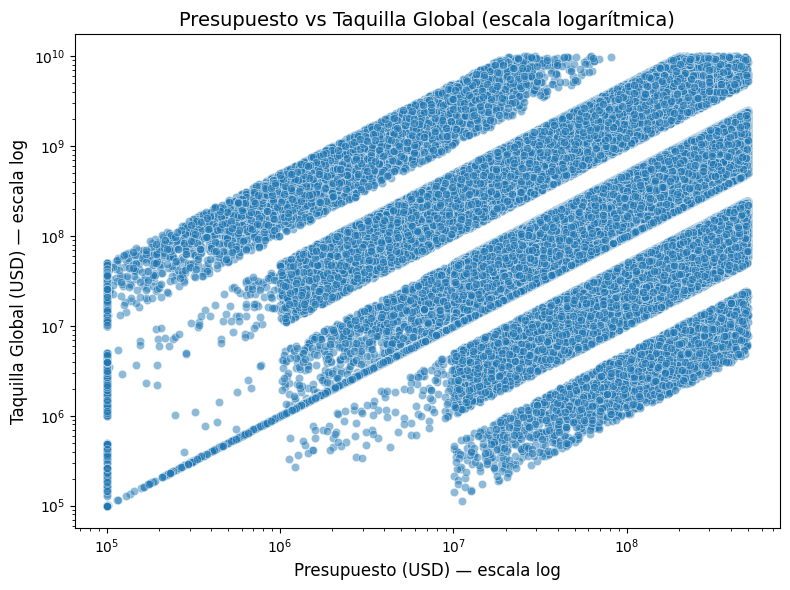

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='BudgetUSD', y='Global_BoxOfficeUSD', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Presupuesto (USD) — escala log", fontsize=12)
plt.ylabel("Taquilla Global (USD) — escala log", fontsize=12)
plt.title("Presupuesto vs Taquilla Global (escala logarítmica)", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=rent_gen.values*100, y=rent_gen.index)
plt.xlabel("Rentabilidad mediana (%)", fontsize=12)
plt.ylabel("Género", fontsize=12)
plt.title("Rentabilidad mediana por género", fontsize=14)
plt.xlim(150, 300)
plt.tight_layout()
plt.show()

NameError: name 'rent_gen' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
# Filtrar valores de rentabilidad extremos
df_limpio = df[(df['Profitability'] > 0.01) & (df['Profitability'] <= 10)].copy()

# Si quieres ver los peores casos también
print("Películas eliminadas por outliers:", len(df) - len(df_limpio))

Películas eliminadas por outliers: 61138


In [ ]:
df_limpio['Profitability'] = (
    (df_limpio['Global_BoxOfficeUSD'] - df_limpio['BudgetUSD']) / df_limpio['BudgetUSD']
)


In [ ]:
df_limpio['Profitability'].describe()


,Profitability
count,406608.000000
mean,1.516373
std,1.402721
min,-0.989985
25%,0.186801
50%,1.469562
75%,2.741536
max,3.999978


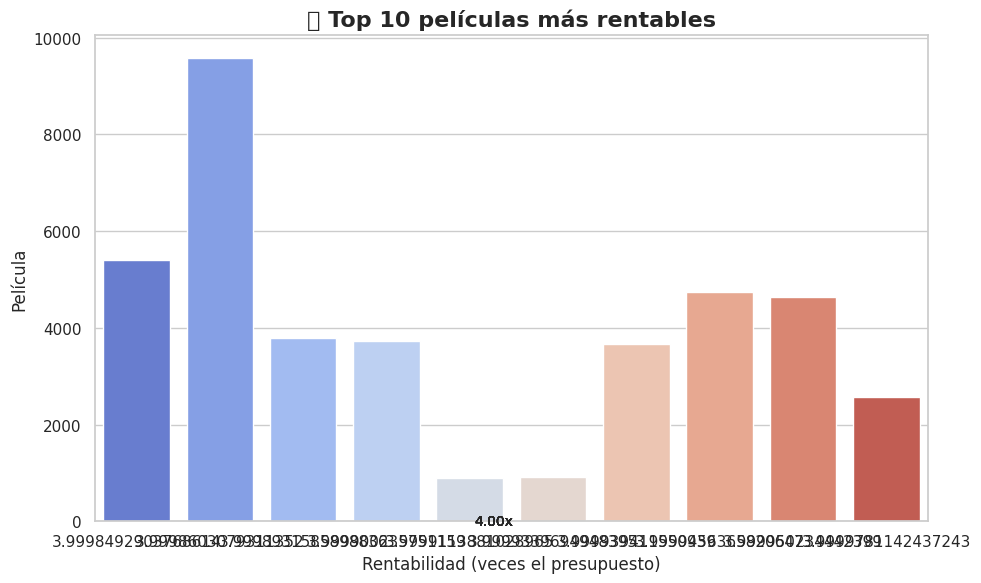

In [ ]:
top10 = df_limpio.sort_values(by='Profitability', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(
    data=top10,
    x='Profitability',
    y='Title',
    palette='coolwarm'
)
plt.title("💰 Top 10 películas más rentables", fontsize=16, fontweight='bold')
plt.xlabel("Rentabilidad (veces el presupuesto)", fontsize=12)
plt.ylabel("Película", fontsize=12)
for i, v in enumerate(top10['Profitability']):
    plt.text(v + 0.05, i, f"{v:.2f}x", va='center', fontsize=10)

plt.tight_layout()
plt.show()


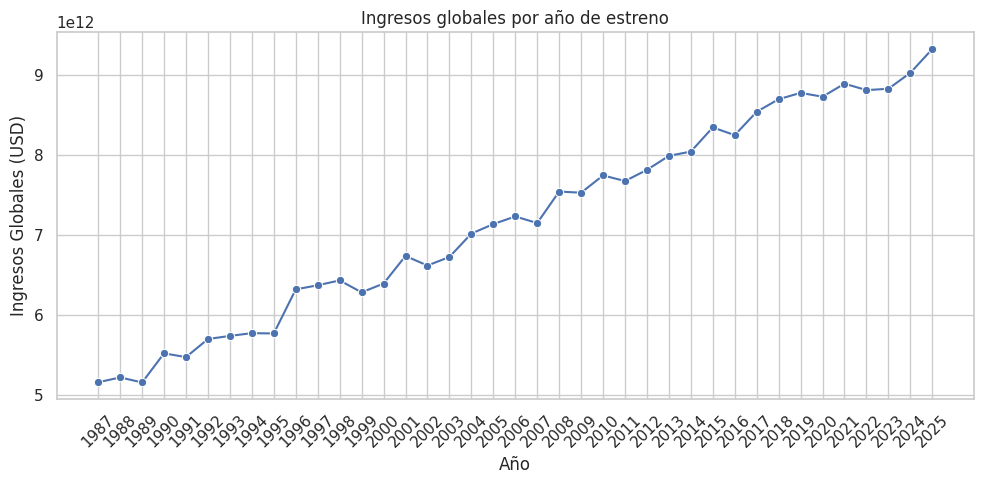

In [ ]:
if 'ReleaseYear' in df_final_corregido.columns:
    ingresos_anio = df_final_corregido.groupby('ReleaseYear')['Global_BoxOfficeUSD'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.lineplot(data=ingresos_anio, x='ReleaseYear', y='Global_BoxOfficeUSD', marker='o')
    plt.title("Ingresos globales por año de estreno")
    plt.xlabel("Año")
    plt.ylabel("Ingresos Globales (USD)")
    plt.xticks(ingresos_anio['ReleaseYear'].unique(), rotation=45)
    plt.tight_layout()
    plt.show()